Plancks Constant (ev um): 1.4145784583604144

Uncertainty:   0.2829156916720829


<Figure size 432x288 with 0 Axes>

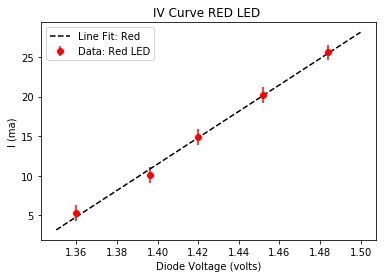

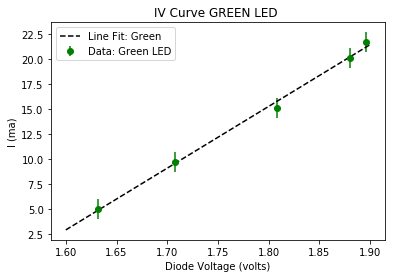

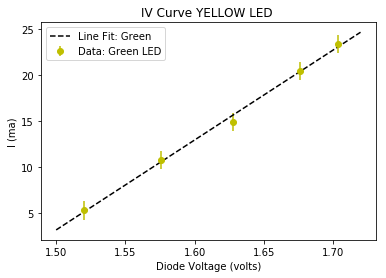

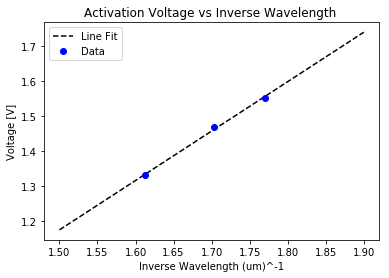

<Figure size 432x288 with 0 Axes>

In [37]:
# Diego Pantoja 
# Planck's Lab
# PHY 116C

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy import optimize
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

# CURVE FIT


# LINE FIT FUNCTION

def line_func(x, a, b): # Defines a function with 3 parameters, the x input array, slope and intercept as a function array
    return (a*x) + b

v_data_red = np.array([1360,1396,1420,1452,1484])
v_data_green = np.array([1632,1708,1808,1880,1896])
v_data_yellow  = np.array([1520,1576,1628,1676,1704])

v_data_red = v_data_red/1000
v_data_green = v_data_green/1000
v_data_yellow = v_data_yellow/1000

I_unc_red = np.array([1,1,1,1,1])
I_unc_green = np.array([1,1,1,1,1])
I_unc_yellow = np.array([1,1,1,1,1])

I_data_red = np.array([5280,10120,14840,20240,25560])
I_data_green = np.array([5040,9760,15120,20120,21680])
I_data_yellow = np.array([5280,10800,14920,20480,23440])


I_data_red_mA = I_data_red/1000
I_data_green_mA = I_data_green/1000
I_data_yellow_mA = I_data_yellow/1000





# RED
plt.errorbar(v_data_red,I_data_red_mA, yerr=I_unc_red,fmt = "ro",label = 'Data: Red LED') # Plot Raw Data with associated errobars

# Calculate the best fit curve for our data

#initial parameter guess

guess_a = 1.0
guess_b = 1.0

# Guess of a Curve Fit to a predefined linear function, # Will optimize data to fit a predefined function
par, cov = optimize.curve_fit(line_func,v_data_red,I_data_red_mA, p0 = [guess_a, guess_b],sigma = I_unc_red, absolute_sigma=True ) # Passes along uncertainties
# We pass along the function we are trying to fit, our data, and an array filled with a guess on its parameters


# Retrive optimized/fitted values of parameters

fit_a = par[0]
fit_b = par[1]

# Plot best fit

x_fit = np.linspace(1.35,1.5,100) 

# Take fitted parameters and test array and define new fitted function for y_fit
y_fit = (fit_a*(x_fit)) + fit_b
v_activation_RED =  -1.00 * (fit_b / fit_a)

plt.plot(x_fit,y_fit,'k--',label = 'Line Fit: Red')
plt.ylabel('I (ma)')
plt.xlabel('Diode Voltage (volts)')
plt.title('IV Curve RED LED ')
plt.legend()
plt.figure()




#GREEN

plt.errorbar(v_data_green,I_data_green_mA, yerr=I_unc_red,fmt = "go",label = 'Data: Green LED') # Plot Raw Data with associated errobars

# Calculate the best fit curve for our data

#initial parameter guess

guess_a = 1.0
guess_b = 1.0

# Guess of a Curve Fit to a predefined linear function, # Will optimize data to fit a predefined function
par, cov = optimize.curve_fit(line_func,v_data_green,I_data_green_mA, p0 = [guess_a, guess_b],sigma = I_unc_green, absolute_sigma=True ) # Passes along uncertainties
# We pass along the function we are trying to fit, our data, and an array filled with a guess on its parameters



# Retrive optimized/fitted values of parameters

fit_a = par[0]
fit_b = par[1]

# Plot best fit

x_fit = np.linspace(1.6,1.9,100) 

# Take fitted parameters and test array and define new fitted function for y_fit
y_fit = (fit_a*(x_fit)) + fit_b
v_activation_GREEN =  -1.00 * (fit_b / fit_a)

plt.plot(x_fit,y_fit,'k--',label = 'Line Fit: Green')
plt.ylabel('I (ma)')
plt.xlabel('Diode Voltage (volts)')
plt.title('IV Curve GREEN LED ')
plt.legend()
plt.figure()



# YELLOW



plt.errorbar(v_data_yellow,I_data_yellow_mA, yerr=I_unc_yellow,fmt = "yo",label = 'Data: Green LED') # Plot Raw Data with associated errobars

# Calculate the best fit curve for our data

#initial parameter guess

guess_a = 1.0
guess_b = 1.0

# Guess of a Curve Fit to a predefined linear function, # Will optimize data to fit a predefined function
par, cov = optimize.curve_fit(line_func,v_data_yellow,I_data_yellow_mA, p0 = [guess_a, guess_b],sigma = I_unc_green, absolute_sigma=True ) # Passes along uncertainties
# We pass along the function we are trying to fit, our data, and an array filled with a guess on its parameters



# Retrive optimized/fitted values of parameters

fit_a = par[0]
fit_b = par[1]

# Plot best fit

x_fit = np.linspace(1.5,1.72,100) 

# Take fitted parameters and test array and define new fitted function for y_fit
y_fit = (fit_a*(x_fit)) + fit_b
v_activation_YELLOW =  -1.00 * (fit_b / fit_a)

plt.plot(x_fit,y_fit,'k--',label = 'Line Fit: Green')
plt.ylabel('I (ma)')
plt.xlabel('Diode Voltage (volts)')
plt.title('IV Curve YELLOW LED ')
plt.legend()
plt.figure()


activation_voltage = np.array([v_activation_RED,v_activation_YELLOW,v_activation_GREEN])
one_ovrWavelength = np.array([1/.620,1/.587,1/.565])

guess_a4 = 1.0
guess_b4 = 1.0

par, cov = optimize.curve_fit(line_func,one_ovrWavelength,activation_voltage, p0 = [guess_a4, guess_b4], absolute_sigma=True )











fit_a = par[0]
fit_b = par[1]


unc11 = fit_a * 0.20
# Dominated by systematic effects

print("Plancks Constant (ev um):", fit_a)

print('\nUncertainty:  ', unc11)

# Plot best fit

x_fit = np.linspace(1.5,1.9,100) 

# Take fitted parameters and test array and define new fitted function for y_fit
y_fit = (fit_a*(x_fit)) + fit_b


plt.errorbar(one_ovrWavelength,activation_voltage,fmt = "bo",label = 'Data')
plt.plot(x_fit,y_fit,'k--',label = 'Line Fit')
plt.ylabel('Voltage [V]')
plt.xlabel('Inverse Wavelength (um)^-1')
plt.title('Activation Voltage vs Inverse Wavelength ')
plt.legend()
plt.figure()




